In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
envanter = pd.read_csv("inventory.csv")

In [100]:
envanter.head()

,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


In [101]:
urunler = pd.read_csv("products.csv")

In [102]:
urunler.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


In [103]:
satis = pd.read_csv("sales.csv")

In [104]:
satis.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


In [105]:
magaza = pd.read_csv("stores.csv")

In [106]:
magaza.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


In [107]:
pd1 = pd.merge(urunler,satis, on = "Product_ID")

In [108]:
pd1.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Units
0,1,Action Figure,Toys,$9.99,$15.99,2,2017-01-01,28,1
1,1,Action Figure,Toys,$9.99,$15.99,34,2017-01-01,36,1
2,1,Action Figure,Toys,$9.99,$15.99,47,2017-01-01,30,3
3,1,Action Figure,Toys,$9.99,$15.99,59,2017-01-01,41,1
4,1,Action Figure,Toys,$9.99,$15.99,61,2017-01-01,36,1


In [109]:
pd2 = pd.merge(pd1, envanter, on=['Product_ID', 'Store_ID'], how='inner')

In [110]:
pd2.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Units,Stock_On_Hand
0,1,Action Figure,Toys,$9.99,$15.99,2,2017-01-01,28,1,6
1,1,Action Figure,Toys,$9.99,$15.99,171,2017-01-01,28,1,6
2,1,Action Figure,Toys,$9.99,$15.99,364,2017-01-01,28,1,6
3,1,Action Figure,Toys,$9.99,$15.99,437,2017-01-01,28,1,6
4,1,Action Figure,Toys,$9.99,$15.99,686,2017-01-01,28,1,6


In [111]:
dataFrame = pd.merge(pd2,magaza,on=("Store_ID"))

In [112]:
dataFrame.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Units,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Action Figure,Toys,$9.99,$15.99,2,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
1,1,Action Figure,Toys,$9.99,$15.99,171,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,1,Action Figure,Toys,$9.99,$15.99,364,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
3,1,Action Figure,Toys,$9.99,$15.99,437,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
4,1,Action Figure,Toys,$9.99,$15.99,686,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01


In [113]:
dataFrame.shape

(823030, 14)

In [114]:
dataFrame.dtypes

Product_ID           int64
Product_Name        object
Product_Category    object
Product_Cost        object
Product_Price       object
Sale_ID              int64
Date                object
Store_ID             int64
Units                int64
Stock_On_Hand        int64
Store_Name          object
Store_City          object
Store_Location      object
Store_Open_Date     object
dtype: object

In [115]:
dataFrame["Date"] = pd.to_datetime(dataFrame["Date"])
dataFrame["Store_Open_Date"] = pd.to_datetime(dataFrame["Store_Open_Date"])
dataFrame["Product_Price"] = dataFrame["Product_Price"].replace({'\$': ''}, regex=True).astype(float)
dataFrame["Product_Cost"] = dataFrame["Product_Cost"].replace({'\$': ''}, regex=True).astype(float)

In [116]:
dataFrame.dtypes

Product_ID                   int64
Product_Name                object
Product_Category            object
Product_Cost               float64
Product_Price              float64
Sale_ID                      int64
Date                datetime64[ns]
Store_ID                     int64
Units                        int64
Stock_On_Hand                int64
Store_Name                  object
Store_City                  object
Store_Location              object
Store_Open_Date     datetime64[ns]
dtype: object

In [117]:
dataFrame.describe().T

,count,mean,min,25%,50%,75%,max,std
Product_ID,823030.0,15.005944,1.0,6.0,14.0,24.0,35.0,9.90284
Product_Cost,823030.0,10.02613,1.99,3.99,7.99,13.99,34.99,7.824972
Product_Price,823030.0,13.797757,2.99,6.99,12.99,15.99,39.99,8.690296
Sale_ID,823030.0,414855.482199,1.0,206841.25,415225.5,622638.75,829262.0,239754.243075
Date,823030,2017-12-11 01:14:08.335540480,2017-01-01 00:00:00,2017-07-08 00:00:00,2017-12-28 00:00:00,2018-05-14 00:00:00,2018-09-30 00:00:00,NaN
Store_ID,823030.0,25.267391,1.0,13.0,26.0,38.0,50.0,14.358599
Units,823030.0,1.316952,1.0,1.0,1.0,1.0,30.0,0.833016
Stock_On_Hand,823030.0,25.319432,0.0,9.0,18.0,35.0,139.0,22.955019
Store_Open_Date,823030,2009-08-21 07:57:07.486240256,1992-09-18 00:00:00,2006-08-30 00:00:00,2010-09-15 00:00:00,2014-03-18 00:00:00,2016-05-18 00:00:00,NaN


In [118]:
dataFrame.columns

Index(['Product_ID', 'Product_Name', 'Product_Category', 'Product_Cost',
       'Product_Price', 'Sale_ID', 'Date', 'Store_ID', 'Units',
       'Stock_On_Hand', 'Store_Name', 'Store_City', 'Store_Location',
       'Store_Open_Date'],
      dtype='object')

In [119]:
dataFrame

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Units,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Action Figure,Toys,9.99,15.99,2,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
1,1,Action Figure,Toys,9.99,15.99,171,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,1,Action Figure,Toys,9.99,15.99,364,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
3,1,Action Figure,Toys,9.99,15.99,437,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
4,1,Action Figure,Toys,9.99,15.99,686,2017-01-01,28,1,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823025,35,Uno Card Game,Games,3.99,7.99,781224,2018-08-26,49,1,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10
823026,35,Uno Card Game,Games,3.99,7.99,781611,2018-08-26,49,1,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10
823027,35,Uno Card Game,Games,3.99,7.99,781797,2018-08-26,49,1,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10
823028,35,Uno Card Game,Games,3.99,7.99,781838,2018-08-26,49,1,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10


In [120]:
dataFrame.drop("Units",axis=1,inplace=True)

In [121]:
dataFrame

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Action Figure,Toys,9.99,15.99,2,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
1,1,Action Figure,Toys,9.99,15.99,171,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,1,Action Figure,Toys,9.99,15.99,364,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
3,1,Action Figure,Toys,9.99,15.99,437,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
4,1,Action Figure,Toys,9.99,15.99,686,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823025,35,Uno Card Game,Games,3.99,7.99,781224,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10
823026,35,Uno Card Game,Games,3.99,7.99,781611,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10
823027,35,Uno Card Game,Games,3.99,7.99,781797,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10
823028,35,Uno Card Game,Games,3.99,7.99,781838,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10


In [122]:
dataFrame.isnull().sum()

Product_ID          0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Sale_ID             0
Date                0
Store_ID            0
Stock_On_Hand       0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
dtype: int64

In [123]:
dataFrame["Month"]=dataFrame["Date"].dt.month
dataFrame

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date,Month
0,1,Action Figure,Toys,9.99,15.99,2,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,1
1,1,Action Figure,Toys,9.99,15.99,171,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,1
2,1,Action Figure,Toys,9.99,15.99,364,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,1
3,1,Action Figure,Toys,9.99,15.99,437,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,1
4,1,Action Figure,Toys,9.99,15.99,686,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823025,35,Uno Card Game,Games,3.99,7.99,781224,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,8
823026,35,Uno Card Game,Games,3.99,7.99,781611,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,8
823027,35,Uno Card Game,Games,3.99,7.99,781797,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,8
823028,35,Uno Card Game,Games,3.99,7.99,781838,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,8


In [124]:
aylar = {1:'Ocak', 2:"Şubat", 3:"Mart" ,4:"Nisan", 5:"Mayıs", 6:"Haziran", 7:"Temmuz", 8:"Ağustos", 9:"Eylül",
        10:"Ekim" ,11:"Kasım" ,12:"Aralık"}

In [125]:
dataFrame["Month"] = [aylar[i] for i in dataFrame["Month"]]
dataFrame

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date,Month
0,1,Action Figure,Toys,9.99,15.99,2,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
1,1,Action Figure,Toys,9.99,15.99,171,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
2,1,Action Figure,Toys,9.99,15.99,364,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
3,1,Action Figure,Toys,9.99,15.99,437,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
4,1,Action Figure,Toys,9.99,15.99,686,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823025,35,Uno Card Game,Games,3.99,7.99,781224,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,Ağustos
823026,35,Uno Card Game,Games,3.99,7.99,781611,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,Ağustos
823027,35,Uno Card Game,Games,3.99,7.99,781797,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,Ağustos
823028,35,Uno Card Game,Games,3.99,7.99,781838,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,Ağustos


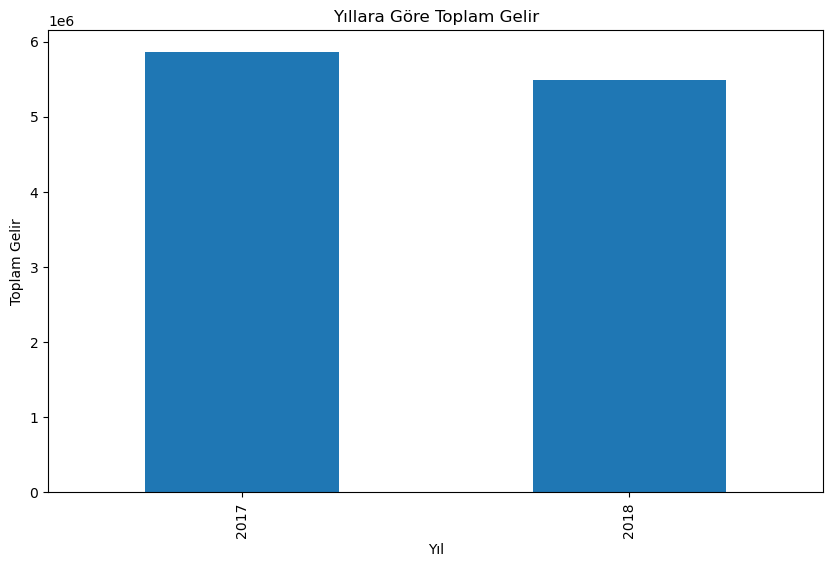

In [126]:
gelir2 = dataFrame.groupby(dataFrame['Date'].dt.year)['Product_Price'].sum()

gelir2.plot(kind='bar', figsize=(10, 6))
plt.title('Yıllara Göre Toplam Gelir')
plt.xlabel('Yıl')
plt.ylabel('Toplam Gelir')
plt.show()

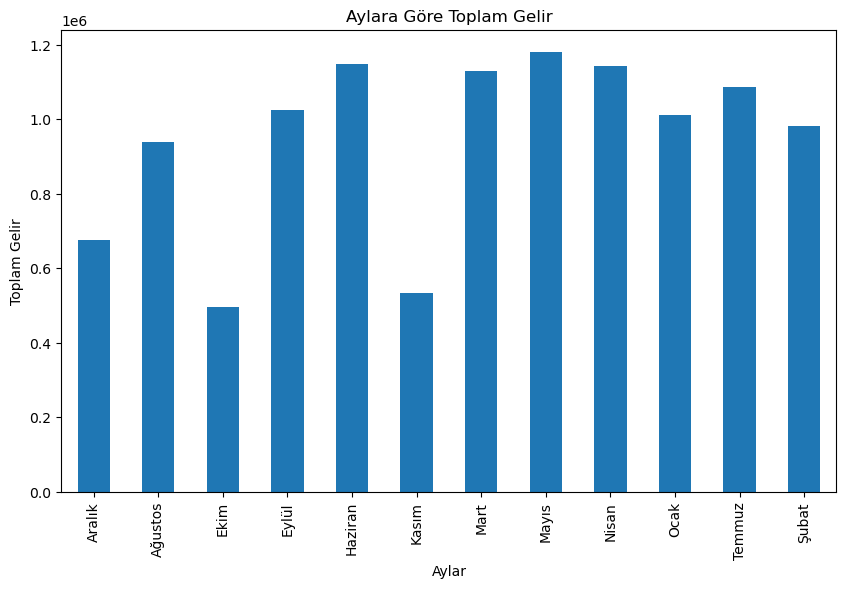

In [127]:
gelir = dataFrame.groupby('Month')['Product_Price'].sum()

gelir.plot(kind='bar', figsize=(10, 6))
plt.title('Aylara Göre Toplam Gelir')
plt.xlabel('Aylar')
plt.ylabel('Toplam Gelir')
plt.show()

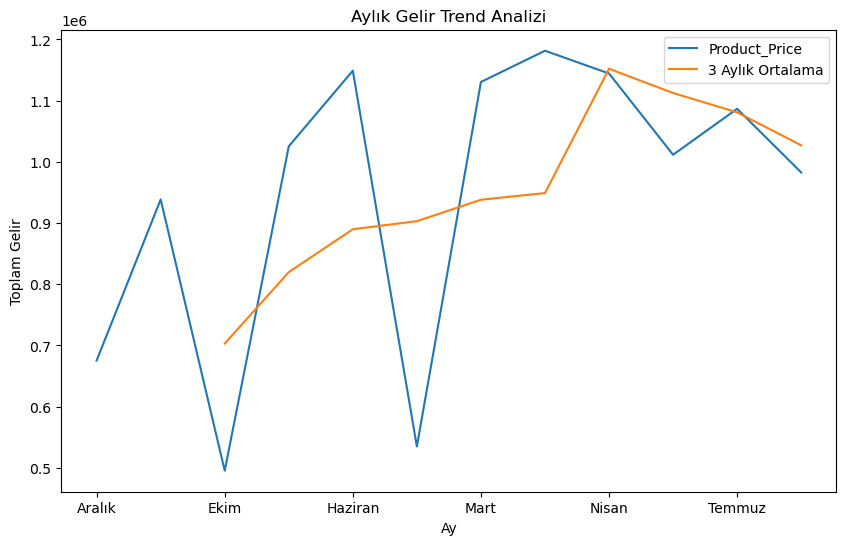

In [128]:
gelir.plot(figsize=(10, 6))
gelir.rolling(window=3).mean().plot(label='3 Aylık Ortalama', figsize=(10, 6))
plt.title('Aylık Gelir Trend Analizi')
plt.xlabel('Ay')
plt.ylabel('Toplam Gelir')
plt.legend()
plt.show()

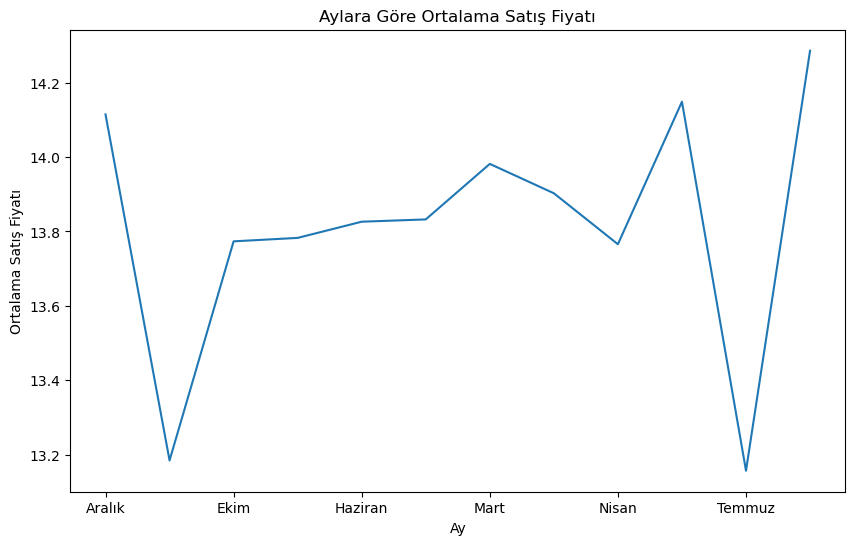

In [129]:
ayaGore = dataFrame.groupby('Month')['Product_Price'].mean()

# Çizgi grafiği ile aylara göre ortalama satış fiyatlarını görselleştirme
ayaGore.plot(kind='line', figsize=(10, 6))
plt.title('Aylara Göre Ortalama Satış Fiyatı')
plt.xlabel('Ay')
plt.ylabel('Ortalama Satış Fiyatı')
plt.show()

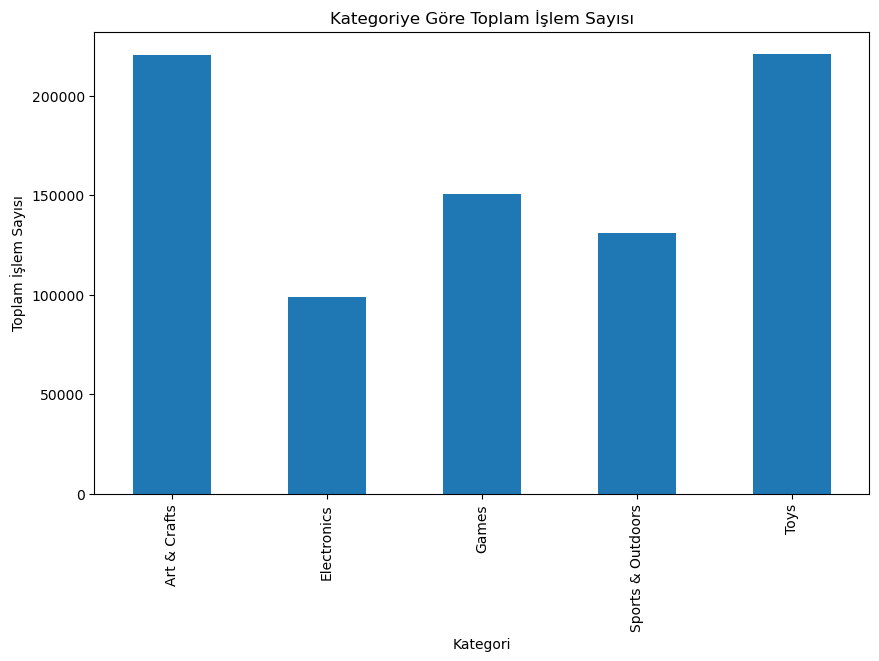

In [130]:
# Ürünleri kategorilerine göre gruplayarak toplam işlem sayısını hesaplıyoruz
urunKategorileri = dataFrame.groupby('Product_Category').size()

urunKategorileri.plot(kind='bar', figsize=(10, 6))
plt.title('Kategoriye Göre Toplam İşlem Sayısı')
plt.xlabel('Kategori')
plt.ylabel('Toplam İşlem Sayısı')
plt.show()

In [131]:
dataFrame

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date,Month
0,1,Action Figure,Toys,9.99,15.99,2,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
1,1,Action Figure,Toys,9.99,15.99,171,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
2,1,Action Figure,Toys,9.99,15.99,364,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
3,1,Action Figure,Toys,9.99,15.99,437,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
4,1,Action Figure,Toys,9.99,15.99,686,2017-01-01,28,6,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Ocak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823025,35,Uno Card Game,Games,3.99,7.99,781224,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,Ağustos
823026,35,Uno Card Game,Games,3.99,7.99,781611,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,Ağustos
823027,35,Uno Card Game,Games,3.99,7.99,781797,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,Ağustos
823028,35,Uno Card Game,Games,3.99,7.99,781838,2018-08-26,49,19,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10,Ağustos


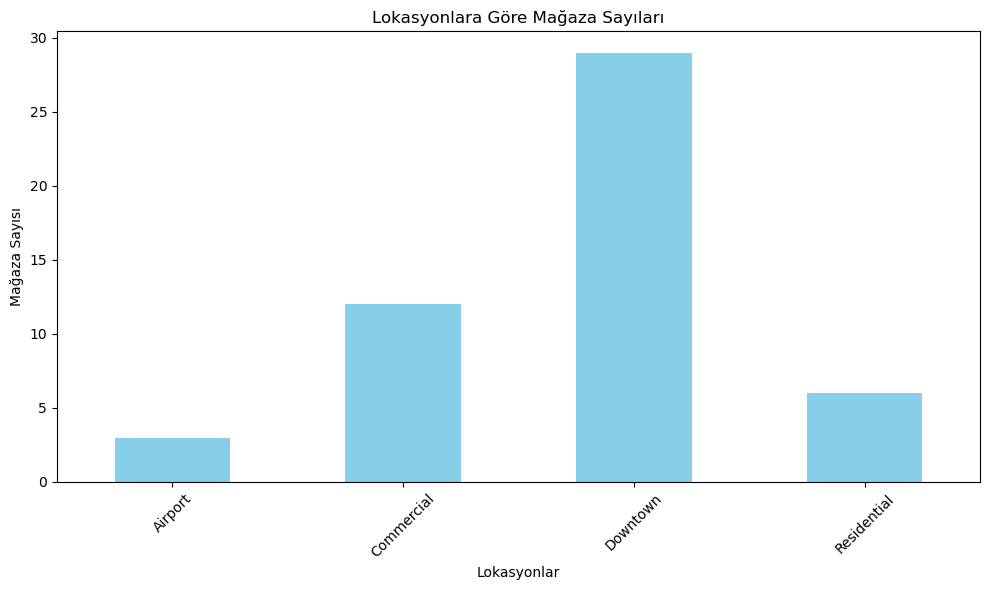

In [132]:
# Store_Location sütununa göre her lokasyondaki benzersiz mağaza sayısı
lokasyonMagazaSayisi = dataFrame.groupby('Store_Location')['Store_Name'].nunique()


plt.figure(figsize=(10, 6))
lokasyonMagazaSayisi.plot(kind='bar', color='skyblue')


plt.xlabel('Lokasyonlar')
plt.ylabel('Mağaza Sayısı')
plt.title('Lokasyonlara Göre Mağaza Sayıları')


plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

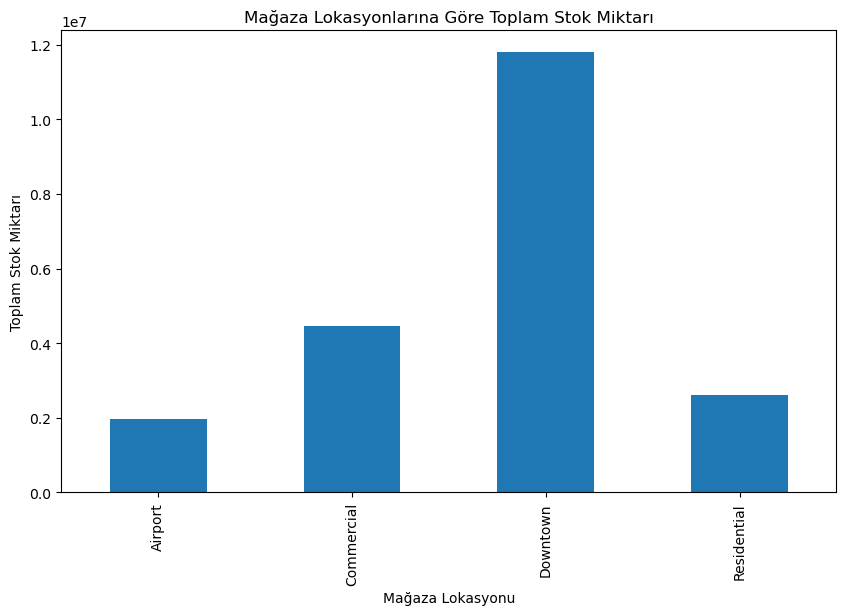

In [133]:
# Mağaza lokasyonlarına göre stok miktarlarını gruplama
stokDagilimi = dataFrame.groupby('Store_Location')['Stock_On_Hand'].sum()


stokDagilimi.plot(kind='bar', figsize=(10, 6))
plt.title('Mağaza Lokasyonlarına Göre Toplam Stok Miktarı')
plt.xlabel('Mağaza Lokasyonu')
plt.ylabel('Toplam Stok Miktarı')
plt.show()

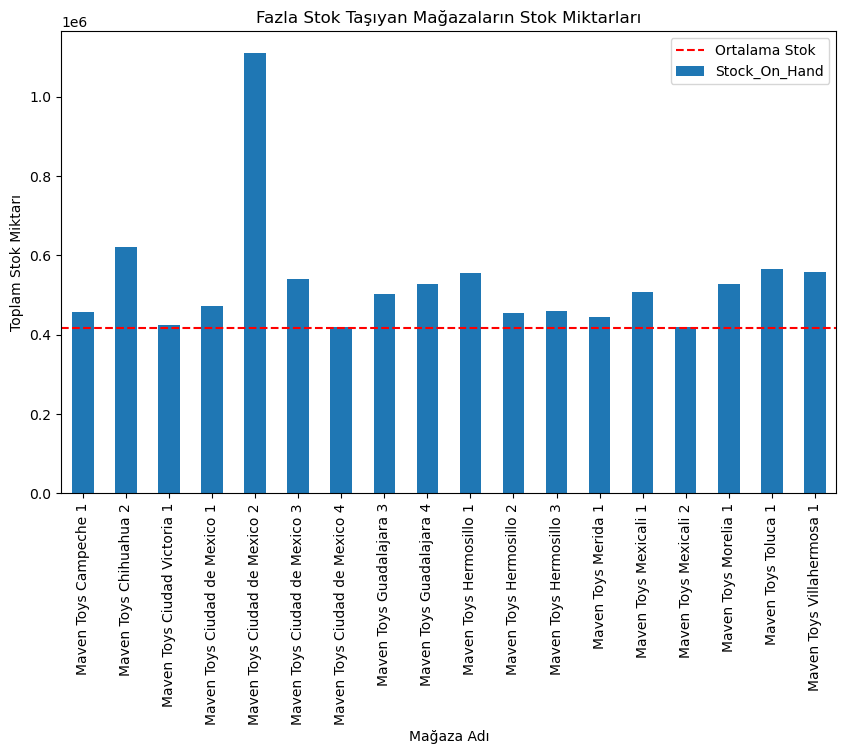

In [134]:
# Mağazaları Store_Name e göre gruplayarak toplam stok miktarlarını hesaplama
stokDagilimi = dataFrame.groupby('Store_Name')['Stock_On_Hand'].sum()

# Mağaza stok miktarlarını ortalama stok miktarından karşılaştırarak fazla stok taşıyan mağazaları belirleme
ortalamaStok = stokDagilimi.mean()
fazlaStokMagazalari = stokDagilimi[stokDagilimi > ortalamaStok]

plt.figure(figsize=(10, 6))
fazlaStokMagazalari.plot(kind='bar')
plt.axhline(y=ortalamaStok, color='red', linestyle='--', label='Ortalama Stok') 
plt.title('Fazla Stok Taşıyan Mağazaların Stok Miktarları')
plt.xlabel('Mağaza Adı')
plt.ylabel('Toplam Stok Miktarı')
plt.legend()
plt.show()

In [135]:
id = dataFrame.loc[dataFrame["Store_Name"]== "Maven Toys Ciudad de Mexico 2","Store_ID"].iloc[0]


In [136]:
belirli_magaza_ID = id 

magaza_lokasyonu = dataFrame.loc[dataFrame['Store_ID'] == belirli_magaza_ID, 'Store_Location'].iloc[0]

print(f"Mağaza {belirli_magaza_ID} şu lokasyonda: {magaza_lokasyonu}")

Mağaza 31 şu lokasyonda: Airport


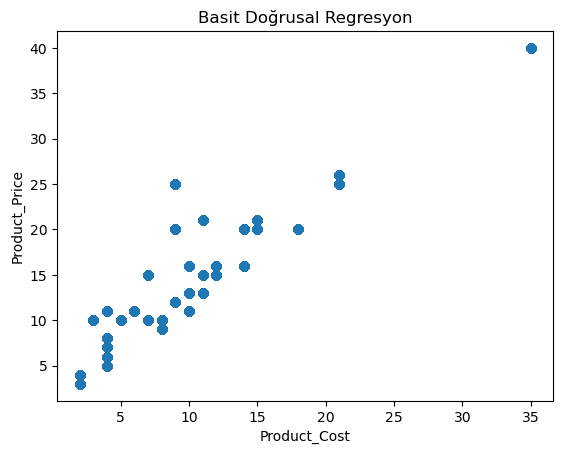

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


X = dataFrame[['Product_Cost']]
y = dataFrame['Product_Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

plt.scatter(X_test,y_test)
plt.title('Basit Doğrusal Regresyon')
plt.xlabel('Product_Cost')
plt.ylabel('Product_Price')
plt.show()

In [138]:


model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

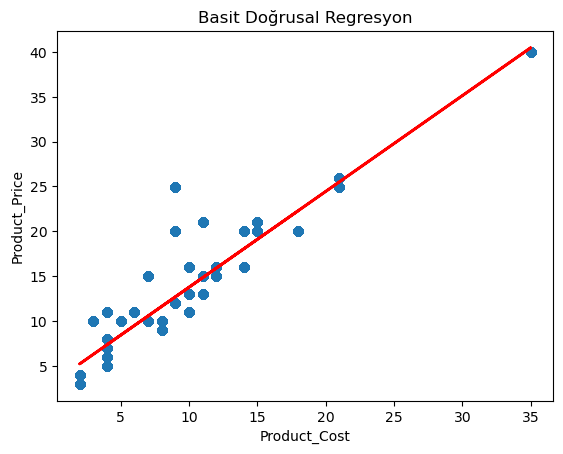

Eğim (slope): 1.0682834057016344
Dik kesim (intercept): 3.086097077590905
Ortalama Mutlak Hata: 1.8610148150001329
Ortalama Kare Hata: 5.694902600532222
Kök Ortalama Kare Hata: 2.3863995056428045


In [139]:

plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2)
plt.title('Basit Doğrusal Regresyon')
plt.xlabel('Product_Cost')
plt.ylabel('Product_Price')
plt.show()

print('Eğim (slope):', model.coef_[0])   
print('Dik kesim (intercept):', model.intercept_)  
y_pred = model.predict(X_test)

# Hata metrikleri
print('Ortalama Mutlak Hata:', metrics.mean_absolute_error(y_test, y_pred))
print('Ortalama Kare Hata:', metrics.mean_squared_error(y_test, y_pred))
print('Kök Ortalama Kare Hata:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

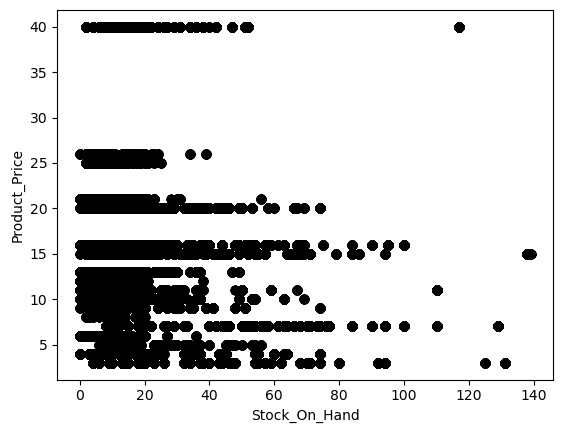

In [140]:

a = dataFrame[['Stock_On_Hand']]
b = dataFrame['Product_Price']


a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=41)

plt.scatter(a_test,b_test , color="black")
plt.xlabel('Stock_On_Hand')
plt.ylabel('Product_Price')
plt.show()

In [141]:


lr = LinearRegression()
lr.fit(a_train, b_train)
b_pred = lr.predict(a_test)

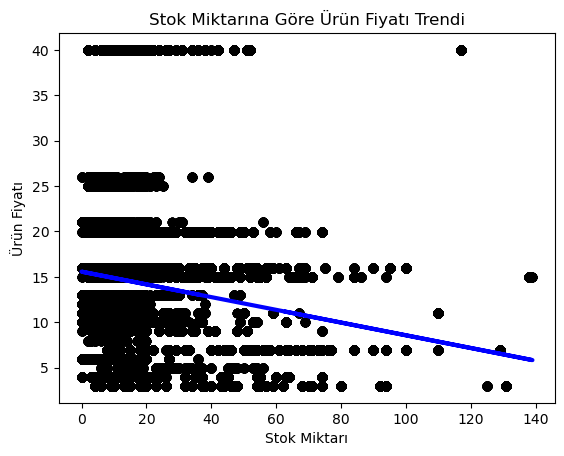

In [142]:
# Modelin görselleştirmesi
plt.scatter(a_test, b_test, color='black')
plt.plot(a_test, b_pred, color='blue', linewidth=3)
plt.xlabel('Stok Miktarı')
plt.ylabel('Ürün Fiyatı')
plt.title('Stok Miktarına Göre Ürün Fiyatı Trendi')
plt.show()

In [143]:

print('Ortalama Kare Hatası:', metrics.mean_squared_error(b_test, b_pred))
print('R-Kare:', metrics.r2_score(b_test, b_pred))



Ortalama Kare Hatası: 72.78769679595311
R-Kare: 0.033728947198336634


In [144]:

x = pd.get_dummies(dataFrame[['Product_Category', 'Store_City']], drop_first=True)
Y = dataFrame['Product_Price']


from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)


In [145]:

from sklearn.linear_model import LinearRegression

ld = LinearRegression()
ld.fit(x_train, Y_train)


LinearRegression()

In [146]:

from sklearn.metrics import mean_squared_error, r2_score

Y_pred = ld.predict(x_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 60.19976877145519
R-squared: 0.20219200639355994


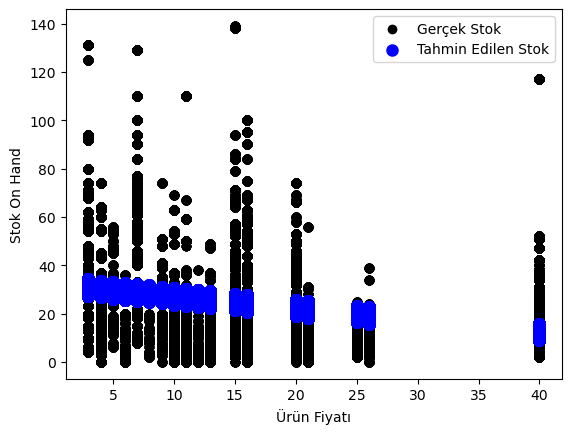

In [147]:

e = dataFrame[['Store_ID', 'Product_Price']]
r = dataFrame['Stock_On_Hand']


e_train, e_test, r_train, r_test = train_test_split(e, r, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(e_train, r_train)


r_pred = model2.predict(e_test)


plt.scatter(e_test['Product_Price'], r_test, color='black', label='Gerçek Stok')
plt.scatter(e_test['Product_Price'], r_pred, color='blue', linewidth=3, label='Tahmin Edilen Stok')
plt.xlabel('Ürün Fiyatı')
plt.ylabel('Stok On Hand')
plt.legend()
plt.show()


In [148]:
dataFrame['Product_Price'] = dataFrame['Product_Price'].round()
dataFrame['Product_Cost'] = dataFrame['Product_Cost'].round()
dataFrame['Product_Price'] = dataFrame['Product_Price'].astype(int)
dataFrame['Product_Cost'] = dataFrame['Product_Cost'].astype(int)


In [149]:
from sklearn.tree import DecisionTreeRegressor

x1=dataFrame.Product_Cost.values.reshape(-1,1)
y1=dataFrame.Product_Price.values.reshape(-1,1)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

dt = DecisionTreeRegressor()


In [150]:
dt.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [151]:
yhead1 = dt.predict(x1_test)

r2 = r2_score(y1_test, yhead1)
print(f'R2 Score: {r2}')

mse = mean_squared_error(y1_test, yhead1)
print(f'Mean Squared Error (MSE): {mse}')


R2 Score: 0.9663845794572867
Mean Squared Error (MSE): 2.536500712005688


In [152]:
x2 = dataFrame[['Product_Cost', 'Stock_On_Hand']].values
y2 = dataFrame['Product_Price'].values.reshape(-1,1)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [153]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [154]:
rf.fit(x2_train,y2_train)

C:\Users\Emre\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [155]:
yhead2= rf.predict(x2_test)

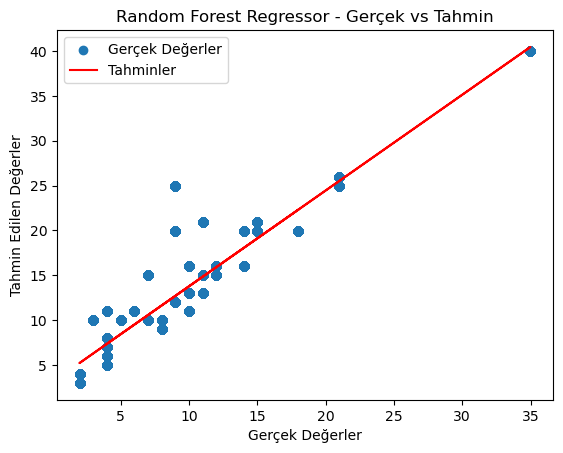

Mean Squared Error: 2.536500712005688
R-squared: -0.984533137937873


In [156]:
plt.scatter(X_test, y_test, label='Gerçek Değerler')
plt.plot(X_test, y_pred, label='Tahminler', color='red')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest Regressor - Gerçek vs Tahmin')
plt.legend()
plt.show()
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, yhead2)
print(f'R-squared: {r2}')

In [157]:
from sklearn.linear_model import Ridge
x3 = dataFrame[['Product_Cost']]
y3 = dataFrame['Product_Price']


In [158]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [159]:

alpha_value = 1.0  # Alpha parametresi (düzenleme katsayısı)
rm = Ridge(alpha=alpha_value)
rm.fit(X_train, y_train)

Ridge()

In [160]:
yhead3 = rm.predict(x3_test)

In [161]:
mse3 = mean_squared_error(y3_test, yhead3)
print(f'Mean Squared Error: {mse3}')
r22 = r2_score(y3_test, yhead3)
print(f'R-squared: {r22}')


Mean Squared Error: 5.637183403525446
R-squared: 0.9252922382836348


In [162]:
from sklearn.linear_model import Lasso

In [163]:
x4 = dataFrame[['Product_Cost']]
y4 = dataFrame['Product_Price']


In [164]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=42)

In [165]:
alpha_value2 = 10.0
lm = Lasso(alpha=alpha_value2)
lm.fit(x4_train, y4_train)


Lasso(alpha=10.0)

In [166]:
yhead4 = lm.predict(x4_test)

Mean Squared Error: 7.260221296173962


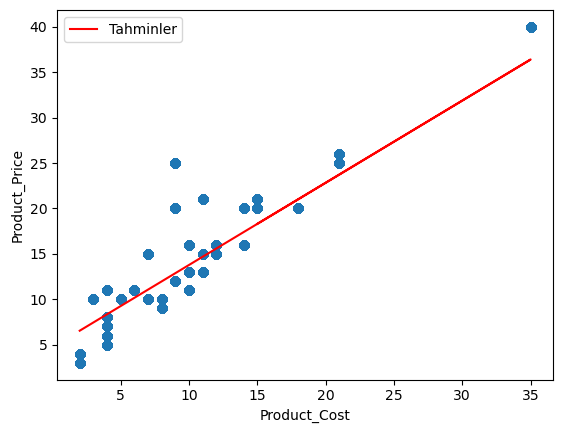

In [167]:
mse4 = mean_squared_error(y4_test, yhead4)
print(f'Mean Squared Error: {mse4}')

plt.scatter(x4_test,y4_test)
plt.plot(x4_test, yhead4, label='Tahminler', color='red')
plt.xlabel('Product_Cost')
plt.ylabel('Product_Price')
plt.legend()
plt.show()

In [168]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error




u = dataFrame[['Product_Cost']]
i = dataFrame['Product_Price']


u_train, u_test, i_train, i_test = train_test_split(u, i, test_size=0.2, random_state=42)


modelss = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regression': RandomForestRegressor()
}


for model_name, model in modelss.items():
    model.fit(u_train, i_train)
    i_pred = model.predict(u_test)

    mseui = mean_squared_error(i_test, i_pred)
    r2ui = r2_score(i_test, i_pred)
    explained_var = explained_variance_score(i_test, i_pred)
    mae = mean_absolute_error(i_test, i_pred)

    print(f'{model_name}:\n'
          f'MSE: {mseui}\n'
          f'R²: {r2ui}\n'
          f'Explained Variance: {explained_var}\n'
          f'MAE: {mae}\n'
          '---------------------')


Linear Regression:
MSE: 5.637185258056677
R²: 0.9252922137061343
Explained Variance: 0.9252922418458218
MAE: 1.857260185540378
---------------------
Ridge Regression:
MSE: 5.6371852563632405
R²: 0.925292213728577
Explained Variance: 0.9252922418683057
MAE: 1.8572601878596238
---------------------
Lasso Regression:
MSE: 5.652476261921841
R²: 0.9250895669956427
Explained Variance: 0.9250896263178613
MAE: 1.8586895894130522
---------------------
ElasticNet Regression:
MSE: 5.65330238017779
R²: 0.9250786187185694
Explained Variance: 0.9250786789966088
MAE: 1.8587264372678545
---------------------
Random Forest Regression:
MSE: 2.5364989845366583
R²: 0.966384602350873
Explained Variance: 0.9663846723593754
MAE: 1.0745989160319103
---------------------
